### web crawling
- 1. requests : json : 동적페이지(URL 변경 없이 데이터를 수정 및 추가)
- 2. requests : html : 정적페이지(URL 변경으로 데이터를 수정 및 추가)
- 3. selenium : web browser : 1, 2번 방법을 사용하지 못할때 사용

### 1. 네이버 주식 데이터 크롤링
- 코스피 데이터 수집
- 코스닥 데이터 수집
- USD환율 데이터 수집
- 그래프 그리기
- 상관계수를 확인

#### 크롤링 절차
- 1. 웹서비스 분석 : URL 분석하기
- 2. request, response 하기 : json 얻기
- 3. 문자열 json 데이터를 dict로 변경(파싱) 후 데이터프레임으로 생성

In [1]:
import requests


In [2]:
# 1. 웹 서비스 분석 : URL 찾기

code, page_size, page = "KOSPI",20,1

url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code={}&pageSize={}&page={}".format(code, page_size,page)

url

'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1'

In [3]:
# 2. request, response : JSON(str) -> JSON(dict) -> DF
response = requests.get(url)
response

<Response [200]>

In [4]:
#JSON(str) -> JSON(dict) -> DF
datas = response.json()["result"]["siseList"]
type(datas), len(datas)

(list, 20)

In [5]:
kospi_df = pd.DataFrame(datas)
kospi_df.tail(3)

,cd,dt,ncv,cv,cr,ov,hv,lv
17,KOSPI,20201111,2485.87,33.04,1.35,2459.50,2488.04,2459.50
18,KOSPI,20201110,2452.83,5.63,0.23,2453.95,2457.94,2435.59
19,KOSPI,20201109,2447.20,30.70,1.27,2438.63,2459.15,2434.52


KOSDAQ 크롤링

In [31]:
def get_stock_data(code,page_size=20,page=1):
    url="https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code={}&pageSize={}&page={}".format(code,page_size,page)
    response = requests.get(url)
    datas=response.json()['result']['siseList']
    return pd.DataFrame(datas)

#### USD 크롤링

In [65]:
def get_currency_data(code,page_size=100,page=1):
    url = 'https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?\
marketIndexCd={}&pageSize={}&page={}'.format(code,page_size,page)
    params={
    "cookie":"NNB=IXOI6NVFRWIF4; NRTK=ag#all_gr#1_ma#-2_si#0_en#0_sp#0; _ga=GA1.2.310078303.1590834359; ASID=6af24fe600000172ea150b9f00000057; page_uid=UIZkMdp0Jy0ssdBgU6Gssssstgd-332041; my_last_menu_id=-2; nid_inf=921058332; NID_AUT=7cKi8IMtYELnPyQ15zYEYMNyE8bUmzrkvrtoKHkx5gqCfl0PpXQBwL07wHpgYkdC; NID_JKL=aywq7xpPPb2Gm/IaHyBDekKmLsxaQ0J42lqip1ydAyk=; NID_SES=AAABch/cACsXr23ZjNUVpSYuJIcNJ+UzNf3FC6ji8H6MT52xkoDXdSX91xt9Wm9LUmZIBaE20svfIrYIgaAJ+Ik3bhxpuFDKGCxhxdrZ8JtVTubW7g6tfT8MYbBKugQCQY21Wuy4v3iEaOUHDwad/VaHIkPz1gMpXaVpbCZXRlFiU3UMQTdxjLKeShfiV+sncZwzfpiciYRax+nEq0uQ9Ovnwn5So/7ysiVWtH6JQmtUzHN1WnMVrDu8JRip0wKyMWtGaDJ4nghsV5yDhRQ4YRwIA1ZpREsi04O4tfech7vNSl34gA7rJ4ssFgsFrRLnJqFLDmuavCg3MS9XpIFnp5fRg2e3TfO/jqngid7rOHoFRxQSBwDG3/NzlRkZMLLEkH1wna3E8rsHN5xK7mgsvfdFw+PK6My5Bn2J+imVEvZ6vDky1LXbz8OJJRuThvXQ2eQ8m0rkK0D79JpmBYkV9aQ9naADWutG7jjWzblRN1yigwxZ7+I84jt7hQLx0Vejmd7jJw==; JSESSIONID=4E5F94135E1CEE4F4D935EE9DC35F3C9; BMR=; XSRF-TOKEN=cc9db1dd-4128-4a56-b12c-4bbf800c551e"}
    response = requests.get(url,headers=params)
    
    data=response.json()['result']['marketIndexDay']
    return pd.DataFrame(data)
    

#### 그래프로 그리기

In [12]:
%matplotlib inline

In [13]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [73]:
kosdaq_df=get_stock_data("KOSDAQ",100)
kospi_df=get_stock_data("KOSPI",100)
USD=get_currency_data("FX_USDKRW",100)

In [68]:
merge_df_1 = pd.merge(kosdaq_df,kospi_df,left_on="dt",right_on="dt")
merge_df_1.tail(2)

,cd_x,dt,ncv_x,cv_x,cr_x,ov_x,hv_x,lv_x,cd_y,ncv_y,cv_y,cr_y,ov_y,hv_y,lv_y
98,KOSDAQ,20200714,778.39,-2.80,-0.36,776.19,782.70,775.29,KOSPI,2183.61,-2.45,-0.11,2176.43,2183.61,2165.60
99,KOSDAQ,20200713,781.19,8.38,1.08,777.92,781.19,773.08,KOSPI,2186.06,35.81,1.67,2170.51,2188.80,2163.07


In [72]:
merge_df_1 = merge_df_1.rename(columns={"ncv_x":"ncv_kosdaq","ncv_y":"ncv_kospi"})
merge_df_1 = merge_df_1[["dt","ncv_kosdaq","ncv_kospi"]]
merge_df_1.tail(2)

,dt,ncv_kosdaq,ncv_kospi
98,20200714,778.39,2183.61
99,20200713,781.19,2186.06


In [74]:
merge_df = pd.merge(merge_df_1,USD)[["dt","ncv_kosdaq","ncv_kospi","nv"]]

([<matplotlib.axis.XTick at 0x7ff0fcb9c590>,
 <a list of 10 Text xticklabel objects>)

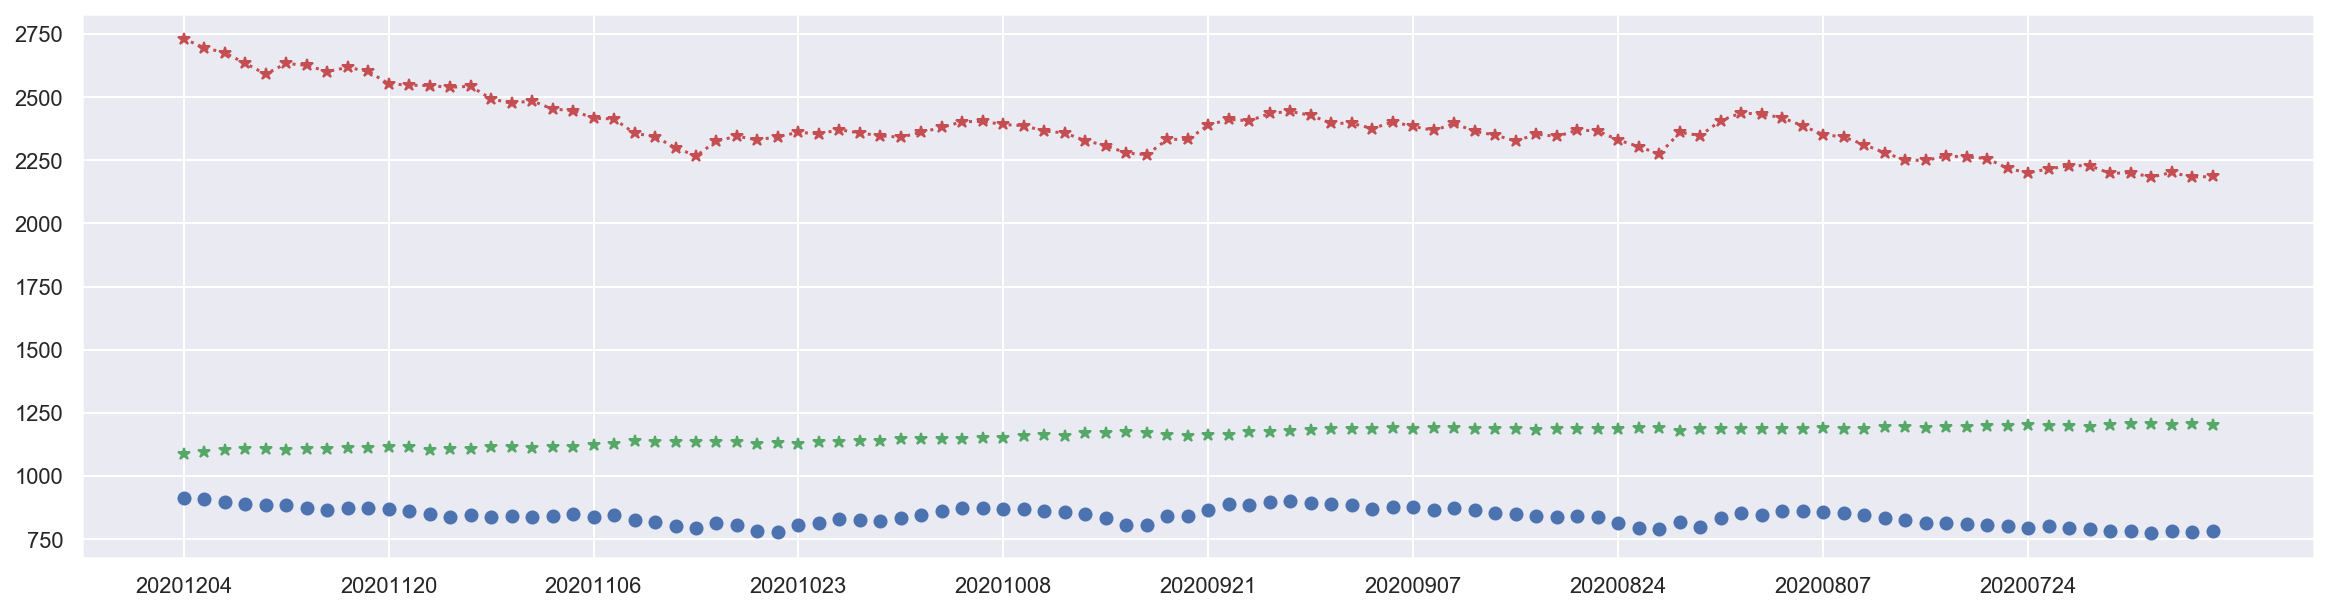

In [77]:
plt.figure(figsize=(20,5))
plt.plot(merge_df["dt"],merge_df["ncv_kospi"],"*r:",label="kospi")
plt.plot(merge_df["dt"],merge_df["ncv_kosdaq"],"bo",label="kosdaq")
plt.plot(merge_df["dt"],merge_df["nv"],"g*",label="USD")

plt.xticks(merge_df_1[::len(merge_df)//10]["dt"])

#### 정규화 : Nomalization
- `z = (x - min(x)) / (max(x) - min(x))`

In [78]:
from sklearn import preprocessing

In [79]:
preprocessing.minmax_scale(kospi_df[::-1]["ncv"])

array([4.47210864e-03, 0.00000000e+00, 3.33491530e-02, 2.73802570e-04,
       3.20896612e-02, 2.66318633e-02, 8.25423481e-02, 8.22320386e-02,
       5.94699182e-02, 3.07206484e-02, 6.25182535e-02, 1.33944217e-01,
       1.45206630e-01, 1.52234229e-01, 1.20035047e-01, 1.23083382e-01,
       1.75890771e-01, 2.34101197e-01, 2.90230724e-01, 3.06768400e-01,
       3.70126314e-01, 4.29066881e-01, 4.54037675e-01, 4.63492991e-01,
       4.08659463e-01, 3.00507447e-01, 3.22959258e-01, 1.65395006e-01,
       2.20830900e-01, 2.66902745e-01, 3.34258178e-01, 3.38985835e-01,
       2.93589369e-01, 3.10656396e-01, 2.60221963e-01, 3.02898657e-01,
       3.29950350e-01, 3.87503651e-01, 3.37032710e-01, 3.66183557e-01,
       3.98474007e-01, 3.50832360e-01, 3.88562354e-01, 3.88945678e-01,
       4.45933119e-01, 4.74536361e-01, 4.60554176e-01, 4.06250000e-01,
       4.17621933e-01, 3.75620619e-01, 2.71940713e-01, 2.73127190e-01,
       1.62620473e-01, 1.73736857e-01, 2.27201373e-01, 2.63361565e-01,
      

([<matplotlib.axis.XTick at 0x7ff0fcd9cb10>,
 <a list of 10 Text xticklabel objects>)

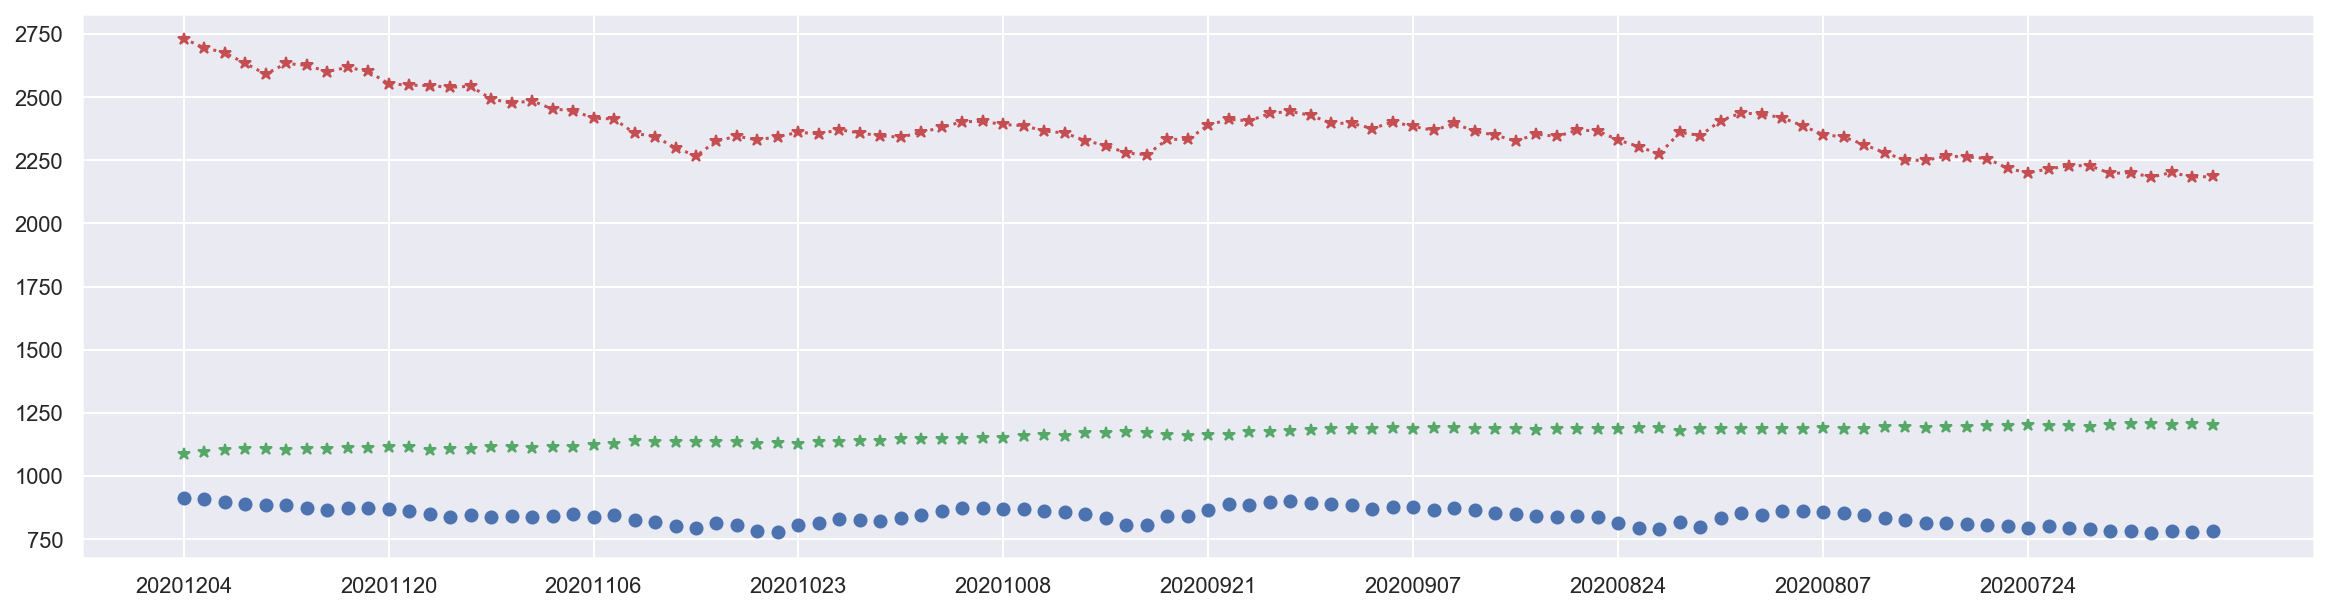

In [80]:
# 코스피, 코스닥 종가 데이터 그리기
plt.figure(figsize=(20,5))
plt.plot(merge_df["dt"],merge_df["ncv_kospi"],"*r:",label="kospi")
plt.plot(merge_df["dt"],merge_df["ncv_kosdaq"],"bo",label="kosdaq")
plt.plot(merge_df["dt"],merge_df["nv"],"g*",label="USD")
plt.xticks(merge_df_1[::len(merge_df_1)//10]["dt"])

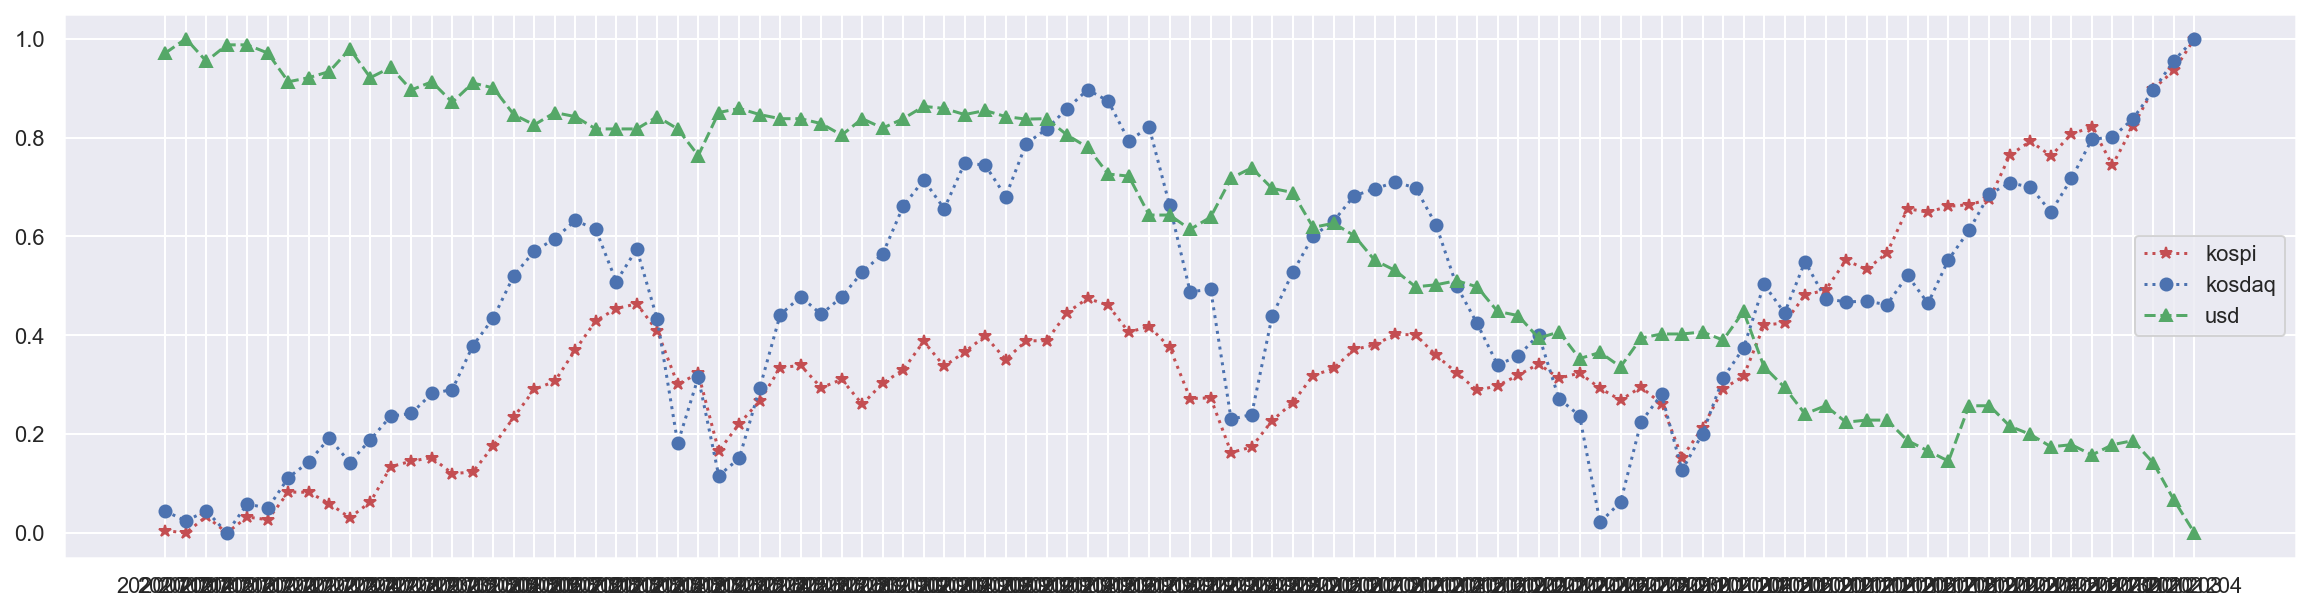

In [82]:
# 코스피, 코스닥, 환율 종가 데이터 그리기
plt.figure(figsize=(20, 5))

plt.plot(kospi_df[::-1]["dt"], 
         preprocessing.minmax_scale(kospi_df[::-1]["ncv"]), 
         "r*:", label="kospi")
plt.plot(kosdaq_df[::-1]["dt"], 
         preprocessing.minmax_scale(kosdaq_df[::-1]["ncv"]), 
         "bo:", label="kosdaq")
plt.plot(USD[::-1]["dt"], 
         preprocessing.minmax_scale(USD[::-1]["nv"]), 
         "g^--", label="usd")
plt.legend(loc=0)

plt.show()

In [83]:
import numpy as np

In [91]:
np.corrcoef(kospi_df["ncv"], kosdaq_df["ncv"])[0,1]

0.7576476427072434

In [86]:
np.corrcoef(kospi_df["ncv"], USD["nv"])[0, 1]

-0.7780300664973258

In [89]:
np.corrcoef(kosdaq_df["ncv"], USD["nv"])[0, 1]

-0.3486927343639194